Hello! Welcome to the second part of our Python Workshop!
In this workshop we will cover the basics of Python applied to **Data Science and Data representation**, since N-dimensional arrays to plots, you will learn the basic knowledge allowing to create you own data representation application

**Python Arrays**

In [5]:
#Arrays in Python are created with the help of a very popular Python library, called NumPy

#Import NumPy library
import numpy as np

def create_a_simple_2d_array():
    #Creates a 2D array initialized with 1s
    my_array = np.ones((5,5), dtype=np.float)
    print("This is the array: \n", my_array)

if __name__ == "__main__":
    create_a_simple_2d_array()

This is the array: 
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [6]:
#How to obtain the number of rows and columns? And why we have to do that?
#Imagine a scenario, where you import a 2D array from a database, but you don't know its length. In those cases, it becomes important to know the lenght of the array, or its dimension

import numpy as np

def know_array_length(rows,columns):
    array = np.ones((rows,columns), dtype=np.int32)

    #Get number of rows and columns
    num_rows = array.shape[0]
    num_columns = array.shape[1]

    print("Number of rows %d:\n Number of columns %d" % (num_rows,num_columns))

if __name__ == "__main__":
    rows = int(input("Number of rows: "))
    columns = int(input("Number of columns: "))

    if(rows == "" or columns == ""):
        exit(-1)
    else:
        know_array_length(rows,columns)

Number of rows 5:
 Number of columns 5


In [10]:
#Now that we know how to create the arrays, how to insert data into it?
#First, we will create a list with some random column values

import numpy as np
import random

def random_column_values():
    matrix = np.ones((10,10), dtype=np.int32)

    rows = matrix.shape[0]
    columns = matrix.shape[1]

    #Loop through every row and column
    for i in range(0,rows):
        for j in range(0,columns):
            matrix[i,j] = random.randint(0,40)
    print("Final matrix:\n", matrix)

if __name__ == "__main__":
    random_column_values()

Final matrix:
 [[28  8 21 21 29 40 23 11 35 13]
 [26  6 19 13  1 31 10  5 37 40]
 [ 4 39 20  7  5 16 10  9 29  8]
 [39 39 38 30 39 40  7  4 40 35]
 [16 33 28  8  4 16 20 20 17 31]
 [20 18 33 39 25  2  5 11 14 34]
 [24 15 34  6  8 25 33 26 20 40]
 [ 3  6 27 19 22 19 28 17 22 40]
 [23 35  4 25  1 39 38 40 20 38]
 [23 36 14 14  6 32 11  3 13  8]]


In [2]:
#Create array with provided lists

import numpy as np

square = np.array([
    [10,20,15,19],
    [15,19,14,13],
    [20,25,32,34],
    [21,28,26,34]
])

print(square)

[[10 20 15 19]
 [15 19 14 13]
 [20 25 32 34]
 [21 28 26 34]]


**Sorting Data, Transposing and Concatenating**

In [3]:
import numpy as np

data = np.array([
    [7, 1, 4],
    [8, 6, 5],
    [1, 2, 3]
])

#Sorting data
np.sort(data)

array([[1, 4, 7],
       [5, 6, 8],
       [1, 2, 3]])

In [4]:
import numpy as np

data = np.array([
    [7, 1, 4],
    [8, 6, 5],
    [1, 2, 3]
])

#Sorting data as a single axis
np.sort(data, axis=None)

array([1, 1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
#Concatenate data

a = np.array([
    [1,2],
    [3,4]
])

b = np.array([
    [5,6],
    [7,8]
])

np.concatenate((a,b))

#Concatenate in reverse order
np.vstack((b,a))

array([[5, 6],
       [7, 8],
       [1, 2],
       [3, 4]])

**Structured Arrays**

Allows us to agregate data of different types into a single numpy array 

In [10]:
data = np.array([
    ("joao", 32, 6),
    ("maria", 15, 20),
    ("rui", 80, 100),
    ("leonor", 38, 9001),
    ], dtype=[("name", str, 10), ("age", int), ("amount", int)])


#Select one row from the array
data[2]

#Select all the names with amount bigger than 50
data[data["amount"] > 50]["name"]

array(['rui', 'leonor'], dtype='<U10')

**SQL Query to NumPy array**

In [ ]:
SELECT name FROM data
WHERE amount > 50; 

**DATABASE MANIPULATION**

Python can be used to retrieve and add information into a database, using specific modules. In this example, we will take a look into the **psycopg2** Python module, that makes the connection between a PostgreSQL database and the script

In [ ]:
import psycopg2 as db
import numpy as np
import random

debug = False

class databaseConnection():
    def __init__(self,databaseobj):
        self.hostname = "test"
        self.database = "postgres"
        self.port = "5432"
        self.user = "postgres"
        self.password = "postgres"
    
    
    def connection(self):
        """
        Establishes the connection to the database
        """

        try:
            connection = db.connect(
                
                user=self.user,
                password=self.password,
                host=self.host,
                port=self.port,
                database=self.database)
            
            #Commits data after the execution
            connection.autocommit = True

            if(debug == True):
                print(connection.get_dsn_parameters(), "\n")

            #Create cursor to execute SQL queries
            cursor = connection.cursor()

            #Select all data from a table
            cursor.execute('''SELECT * FROM students''')

            connection.commit()
            print("Data inserted")

        except (Exception, psycopg2.Error) as error:
            print("Error while connecting to PostgreSQL", error)
            connection.close()
        
        finally:
            # closing database connection
            if(connection):
                cursor.close()
                connection.close()
                print("PostgreSQL connection is closed")

if __name__ == "__main__":
    databaseobj = databaseConnection()
    databaseobj.connection()

**Pandas**

Pandas is a Python library used for data science, more specifically, for data visualization and tables organization.


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

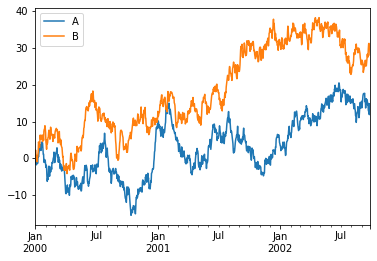

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#One-dimensional ndarray with axis labels
panda_series = pd.DataFrame(np.random.randn(1000,2), index=panda_series.index, columns=list("AB"))
panda_series = panda_series.cumsum()

plt.figure()
panda_series.plot()